# DECISION TREE CLASSIFIER ALGORITHM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('A.csv')

del df["LAST_POLL"]
del df["UUID"]
del df["dom"]

df.head()

,VMID,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,timecpu_slope,...,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
0,7,88.2065,30.1414,0.0,0.0,79.8981,5.5275,0.0,0.0,0.0000,...,0.0,24.3045,89.9850,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,7,87.8708,27.3499,0.0,0.0,0.0000,0.0000,0.0,0.0,73.8278,...,0.0,5.9061,89.8986,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,7,87.8865,27.2996,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0000,...,0.0,32.8285,89.9897,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,7,87.8760,27.4076,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0000,...,0.0,4.2364,89.8741,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,7,87.7241,25.8210,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0000,...,0.0,22.7510,89.9864,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [3]:
df=df.dropna()

In [4]:
df.columns

Index(['VMID', 'rxbytes_slope', 'rxpackets_slope', 'rxerrors_slope',
       'rxdrops_slope', 'txbytes_slope', 'txpackets_slope', 'txerrors_slope',
       'txdrops_slope', 'timecpu_slope', 'timesys_slope', 'timeusr_slope',
       'state_slope', 'memmax_slope', 'mem_slope', 'cpus_slope',
       'cputime_slope', 'memactual_slope', 'memswap_in_slope',
       'memswap_out_slope', 'memmajor_fault_slope', 'memminor_fault_slope',
       'memunused_slope', 'memavailable_slope', 'memusable_slope',
       'memlast_update_slope', 'memdisk_cache_slope',
       'memhugetlb_pgalloc_slope', 'memhugetlb_pgfail_slope', 'memrss_slope',
       'vdard_req_slope', 'vdard_bytes_slope', 'vdawr_reqs_slope',
       'vdawr_bytes_slope', 'vdaerror_slope', 'hdard_req_slope',
       'hdard_bytes_slope', 'hdawr_reqs_slope', 'hdawr_bytes_slope',
       'hdaerror_slope', 'Status'],
      dtype='object')

In [5]:
pd.set_option('display.max_columns',None)
df.tail()

,VMID,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,timecpu_slope,timesys_slope,timeusr_slope,state_slope,memmax_slope,mem_slope,cpus_slope,cputime_slope,memactual_slope,memswap_in_slope,memswap_out_slope,memmajor_fault_slope,memminor_fault_slope,memunused_slope,memavailable_slope,memusable_slope,memlast_update_slope,memdisk_cache_slope,memhugetlb_pgalloc_slope,memhugetlb_pgfail_slope,memrss_slope,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
9604,6,88.0519,29.5388,0.0,0.0,90.0,89.9974,0.0,0.0,73.3008,23.4287,8.1381,0.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,Attack
9605,6,88.7897,30.9638,0.0,0.0,90.0,89.9974,0.0,0.0,0.0000,21.8014,8.0445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,Attack
9606,6,88.0519,29.5388,0.0,0.0,90.0,89.9977,0.0,0.0,0.0000,26.5651,8.4934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-81.6341,0.0,0.0,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,Attack
9607,6,89.1474,45.9392,0.0,0.0,90.0,89.9950,0.0,0.0,0.0000,13.1340,4.1562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,Attack
9608,6,87.7974,26.5651,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.9946,0.0,0.0,20.1363,89.965,0.0,0.0,0.0,0.0,0.0,0.0,Attack


In [6]:
x1 = df.drop(labels='Status', axis=1)
y1 = df.loc[:,'Status']

In [7]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({'Normal': 7288, 'Attack': 2306})
OVER SAMPLING DATA COUNT  :  Counter({'Normal': 7288, 'Attack': 7288})


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=6, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  11660
NUMBER OF TEST DATASET      :  2916
TOTAL NUMBER OF DATASET    :  14576


In [9]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  11660
NUMBER OF TEST DATASET      :  2916
TOTAL NUMBER OF DATASET    :  14576


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
predicted = DTC.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF DECISION TREE CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF DECISION TREE CLASSIFIER:


 [[1458    0]
 [   1 1457]]


In [14]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF DECISION TREE CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF DECISION TREE CLASSIFIER IS : 99.96570644718793


In [15]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF DECISION TREE CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF DECISION TREE CLASSIFIER IS : 0.034293552812071325


In [16]:
from sklearn.metrics import classification_report
C = classification_report(y_test,predicted)
print("THE CLASSIFICATION REPORT SCORES OF DECISION TREE CLASSIFIER IS \n\n:",C)

THE CLASSIFICATION REPORT SCORES OF DECISION TREE CLASSIFIER IS 

:               precision    recall  f1-score   support

      Attack       1.00      1.00      1.00      1458
      Normal       1.00      1.00      1.00      1458

    accuracy                           1.00      2916
   macro avg       1.00      1.00      1.00      2916
weighted avg       1.00      1.00      1.00      2916



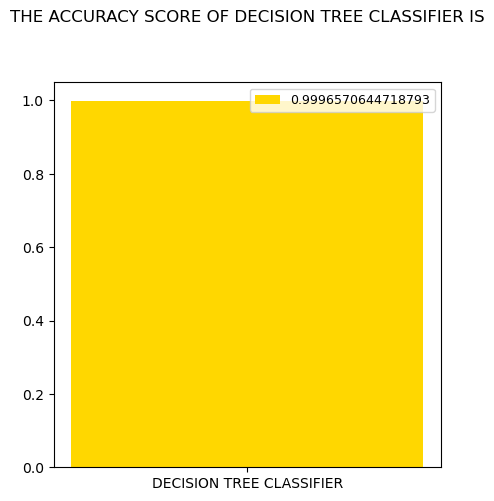

In [17]:
def graph():
    import matplotlib.pyplot as plt
    data=[a]
    alg="DECISION TREE CLASSIFIER"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("gold"))
    plt.title("THE ACCURACY SCORE OF DECISION TREE CLASSIFIER IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()

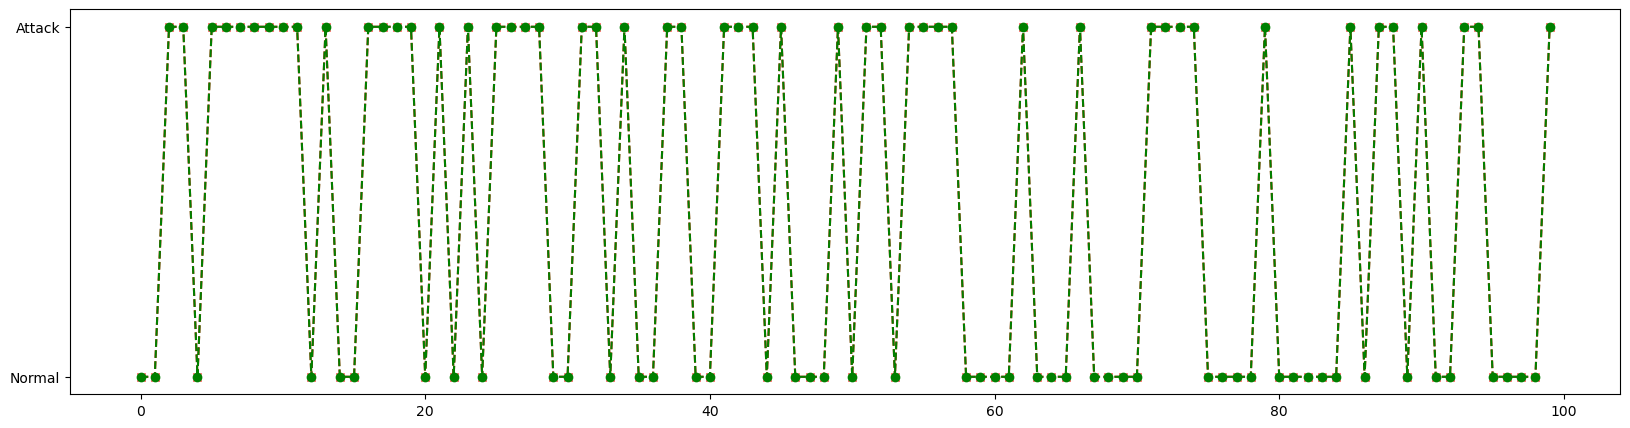

In [18]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [19]:
import joblib
joblib.dump(DTC, 'CTC.pkl')

['CTC.pkl']